# Eigenvalue spectra of a random matrix 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatProgress
from scipy.stats import invgamma, t

### 100 ensemble calculations of eigenvalue spectra

In [37]:
#
Dist = "sGamma"

# size of random matrices
N = 100

# size of ensemble members
N_ens = 1000

# mean of each element
J0 = 1.5
# J0 = 1
mu = J0 / N

# std of each element
J = 1
# J = 3.4
std = J / np.sqrt(N)

# sampling N_ens random matrices
fp3 = FloatProgress(min=1, max=N_ens)
display(fp3)
fp3.value=0
fp3.description = '#ens: %d'%(0)
evs2 = np.array([])
for i_ens in range(N_ens):
    if (i_ens+1)%10==0:
        fp3.value=i_ens+1
        fp3.description = '#ens: %d'%(i_ens+1)
    Sgn = 1.0
    Sgn = 2.0 * ( np.random.randint(0,2,size=(N,N)) - 0.5)
    M = np.multiply(Sgn, np.random.gamma(shape=mu**2/std**2, scale=std**2/mu, size=(N, N)))
#     M = np.random.cauchy
    evs2 = np.append(evs2, np.linalg.eigvals(M))
    
print(evs2.size)

FloatProgress(value=1.0, max=1000.0, min=1.0)

100000


### Probability distribution for the real and imaginary parts of eigenvalues

Eigenvalues are complex numbers, so we calculate the histograms of their real and imaginary parts, normalize them so that the sum is unity, and represent them as probability density functions.

In [38]:
hh2R, bb2R = np.histogram(np.real(evs2), bins=100, range=(-J*1.5, np.maximum(J0, J)*1.5), density=True)
hh2I, bb2I = np.histogram(np.imag(evs2), bins=200, range=(-J*1.5, J*1.5), density=True)

fig2, ax2 = plt.subplots(ncols=2, figsize=(9*2, 6))
ax2[0].plot([-J*1.5, J0*1.5], [0, 0], ':', c='k', zorder=0)
ax2[0].plot((bb2R[:-1]+bb2R[1:])/2, hh2R, c='tab:blue', lw=2, zorder=2, label='PDF of real part')

ax2[0].set_xlabel('$x$', fontsize=14)
ax2[0].legend(fontsize=12)
ax2[0].set_ylim(0, 1)

ax2[1].plot([-J*1.5,  J*1.5], [0, 0], ':', c='k', zorder=0)
ax2[1].plot(bb2I[:-1], hh2I, c='tab:blue', lw=2, zorder=2, label='PDF of imag')
ax2[1].legend(fontsize=12)
print(np.max(hh2I))


8.279987196927316


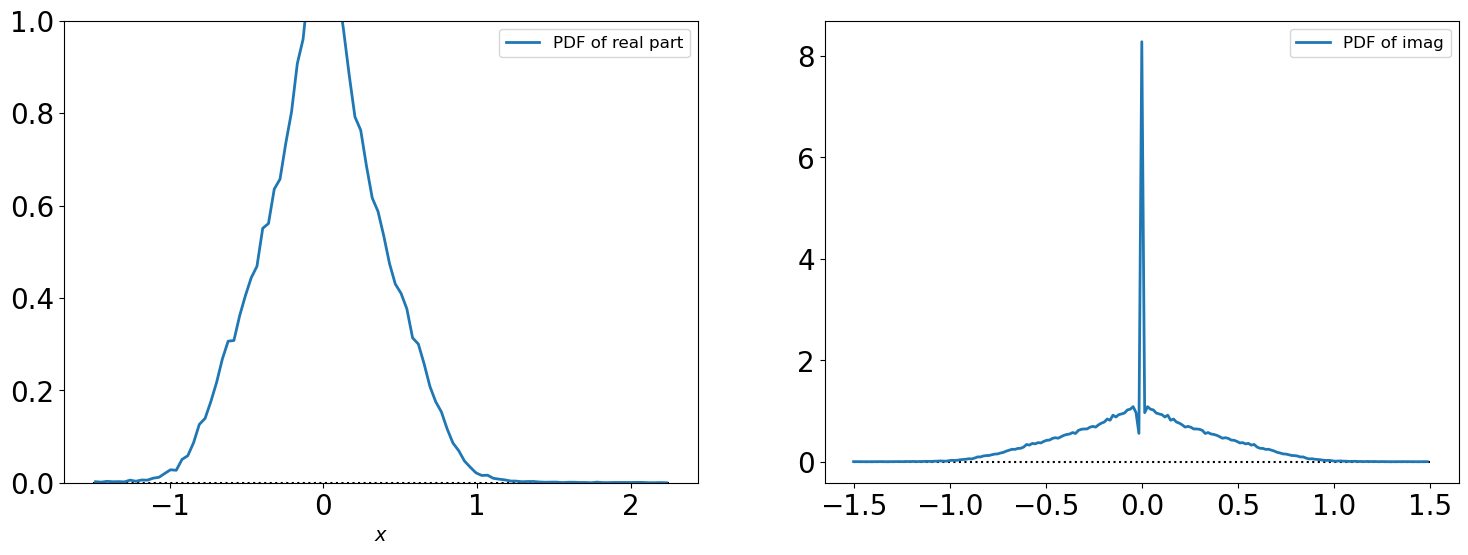

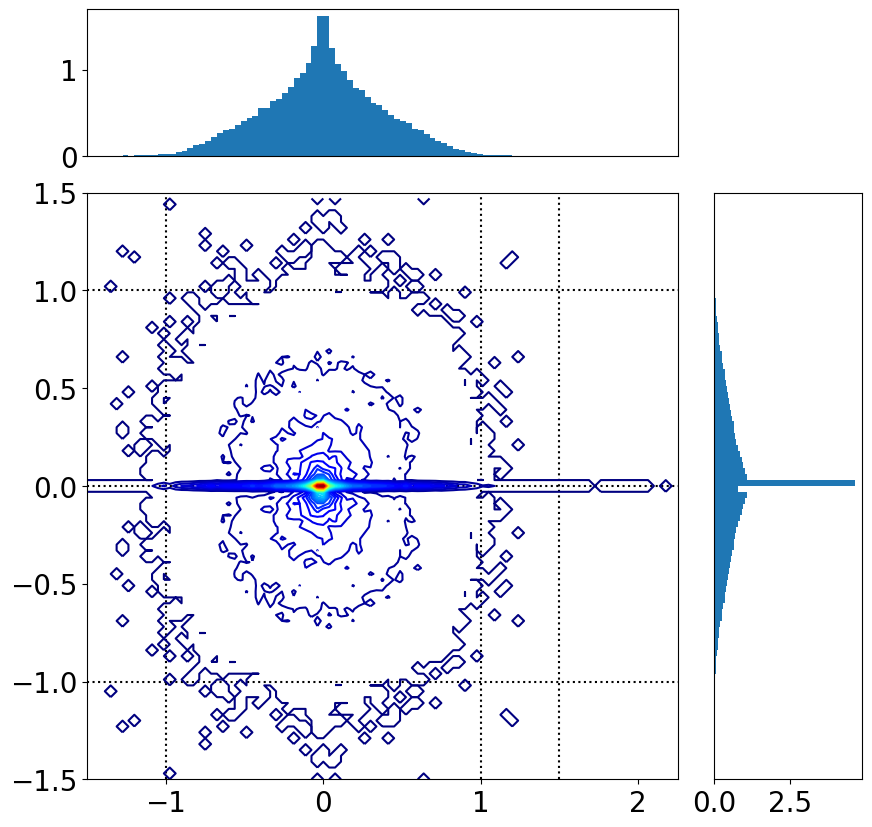

In [39]:
parameters = {'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(parameters)


fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(5*2, 5*2), 
                         gridspec_kw={'width_ratios':[4, 1], 'height_ratios':[1, 4]})
ax2[0, 1].axis('off')
ax2[0, 0].hist(np.real(evs2), bins=100, range=(-J*1.5, np.maximum(J0, J)*1.5), density=True)
ax2[0, 0].set_xlim(-J*1.5, np.maximum(J0, J)*1.5)
ax2[0, 0].set_xticks([])


ax2[1, 1].hist(np.imag(evs2), bins=100, range=(-J*1.5, J*1.5), density=True, orientation='horizontal')
ax2[1, 1].set_ylim(-J*1.5, J*1.5)
ax2[1, 1].set_yticks([])

hh2d, binx, biny = np.histogram2d(np.real(evs2), np.imag(evs2), range=((-J*1.5, np.maximum(J0, J)*1.5), (-J*1.5, J*1.5)), bins=(100, 100))
ax2[1, 0].contour(binx[:-1], biny[:-1], hh2d.T, cmap='jet', levels=40)
ax2[1, 0].set_xlim(-J*1.5, np.maximum(J0, J)*1.5)
ax2[1, 0].set_ylim(-J*1.5, J*1.5)
ax2[1, 0].plot([-J*1.5, np.maximum(J0, J)*1.5], [0, 0], 'k:', zorder=0)
ax2[1, 0].plot([J0, J0], [-J*1.5, J*1.5], 'k:', zorder=0)
ax2[1, 0].plot([-J, -J], [-J*1.5, J*1.5], 'k:', zorder=0)
ax2[1, 0].plot([J, J], [-J*1.5, J*1.5], 'k:', zorder=0)
ax2[1, 0].plot([-J*1.5, np.maximum(J0, J)*1.5], [J, J], 'k:', zorder=0)
ax2[1, 0].plot([-J*1.5, np.maximum(J0, J)*1.5], [-J, -J], 'k:', zorder=0)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(Dist + ".jpg")

plt.show()

In [40]:
Dist = "Normal"

# sampling N_ens random matrices
fp3 = FloatProgress(min=1, max=N_ens)
display(fp3)
fp3.value=0
fp3.description = '#ens: %d'%(0)
evs2 = np.array([])
mu = 0
for i_ens in range(N_ens):
    if (i_ens+1)%10==0:
        fp3.value=i_ens+1
        fp3.description = '#ens: %d'%(i_ens+1)
    M = np.random.normal(mu,std, size=(N, N))
    evs2 = np.append(evs2, np.linalg.eigvals(M))
    
print(evs2.size)

FloatProgress(value=1.0, max=1000.0, min=1.0)

100000


In [41]:
hh2R, bb2R = np.histogram(np.real(evs2), bins=100, range=(-J*1.5, np.maximum(J0, J)*1.5), density=True)
hh2I, bb2I = np.histogram(np.imag(evs2), bins=200, range=(-J*1.5, J*1.5), density=True)

fig2, ax2 = plt.subplots(ncols=2, figsize=(9*2, 6))
ax2[0].plot([-J*1.5, J0*1.5], [0, 0], ':', c='k', zorder=0)
ax2[0].plot((bb2R[:-1]+bb2R[1:])/2, hh2R, c='tab:blue', lw=2, zorder=2, label='PDF of real part')

ax2[0].set_xlabel('$x$', fontsize=14)
ax2[0].legend(fontsize=12)
ax2[0].set_ylim(0, 1)

ax2[1].plot([-J*1.5,  J*1.5], [0, 0], ':', c='k', zorder=0)
ax2[1].plot(bb2I[:-1], hh2I, c='tab:blue', lw=2, zorder=2, label='PDF of imag')
ax2[1].legend(fontsize=12)
print(np.max(hh2I))


5.705333333333371


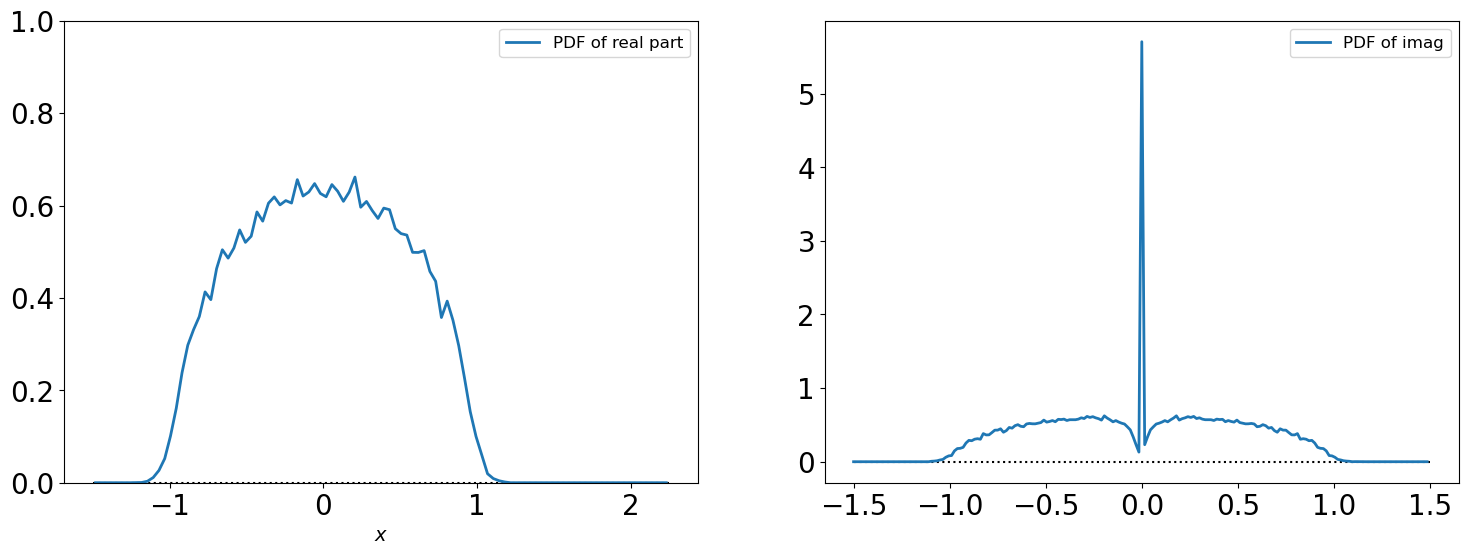

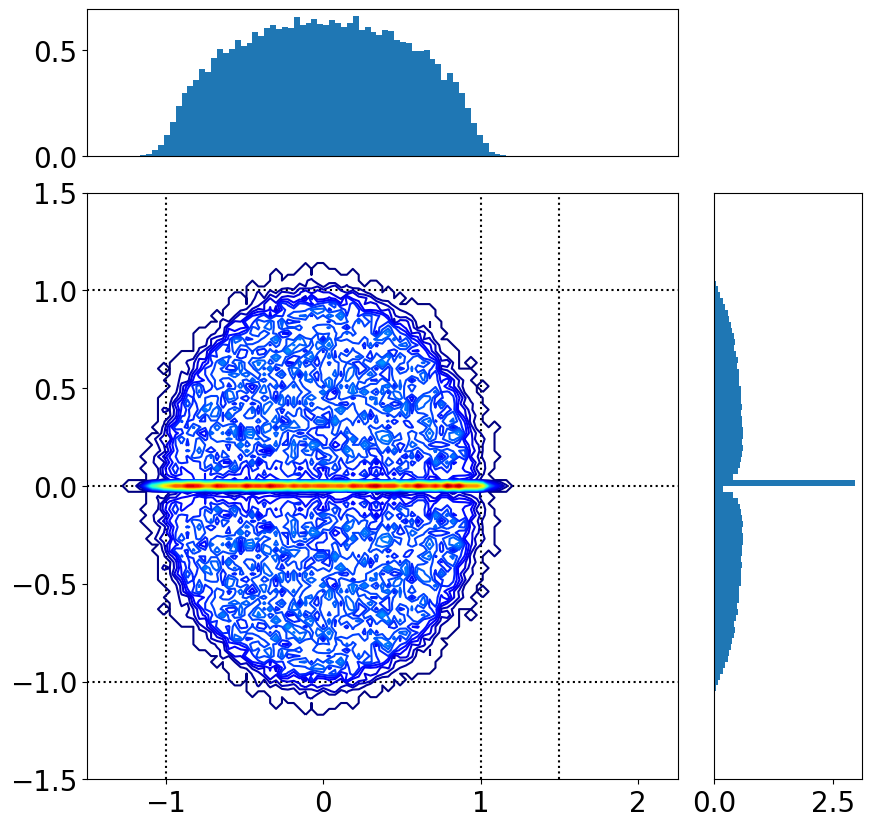

In [42]:
parameters = {'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(parameters)


fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(5*2, 5*2), 
                         gridspec_kw={'width_ratios':[4, 1], 'height_ratios':[1, 4]})
ax2[0, 1].axis('off')
ax2[0, 0].hist(np.real(evs2), bins=100, range=(-J*1.5, np.maximum(J0, J)*1.5), density=True)
ax2[0, 0].set_xlim(-J*1.5, np.maximum(J0, J)*1.5)
ax2[0, 0].set_xticks([])

ax2[1, 1].hist(np.imag(evs2), bins=100, range=(-J*1.5, J*1.5), density=True, orientation='horizontal')
ax2[1, 1].set_ylim(-J*1.5, J*1.5)
ax2[1, 1].set_yticks([])

hh2d, binx, biny = np.histogram2d(np.real(evs2), np.imag(evs2), range=((-J*1.5, np.maximum(J0, J)*1.5), (-J*1.5, J*1.5)), bins=(100, 100))
ax2[1, 0].contour(binx[:-1], biny[:-1], hh2d.T, cmap='jet', levels=40)
ax2[1, 0].set_xlim(-J*1.5, np.maximum(J0, J)*1.5)
ax2[1, 0].set_ylim(-J*1.5, J*1.5)
ax2[1, 0].plot([-J*1.5, np.maximum(J0, J)*1.5], [0, 0], 'k:', zorder=0)
ax2[1, 0].plot([J0, J0], [-J*1.5, J*1.5], 'k:', zorder=0)
ax2[1, 0].plot([-J, -J], [-J*1.5, J*1.5], 'k:', zorder=0)
ax2[1, 0].plot([J, J], [-J*1.5, J*1.5], 'k:', zorder=0)
ax2[1, 0].plot([-J*1.5, np.maximum(J0, J)*1.5], [J, J], 'k:', zorder=0)
ax2[1, 0].plot([-J*1.5, np.maximum(J0, J)*1.5], [-J, -J], 'k:', zorder=0)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(Dist + ".jpg")
plt.show()